importing the Required Libraries

In [1]:
import pandas as pd
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix)

In [2]:
import sklearn.metrics

In [3]:
from imblearn.over_sampling import SMOTE
import xgboost as xgb
import matplotlib.pyplot as plt

importing the train and test data

In [4]:
train=pd.read_csv("train_dataset.csv")
test=pd.read_csv("test_dataset.csv")

In [5]:
x_train=train.drop("fraud_bool",axis=1)
y_train=train["fraud_bool"]
x_test=test.drop("fraud_bool",axis=1)
y_test=test["fraud_bool"]

training XGBoost Model

In [21]:
scale = len(y_train[y_train==0]) / len(y_train[y_train==1])

In [60]:
model=xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    scale_pos_weight=scale,
    eval_metric='aucpr',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
                                                  )

In [61]:
model.fit(x_train,y_train)


C:\Users\anubhav goyal\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:01:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

Evaluation The Model

In [62]:
y_pred=model.predict(x_test)

In [63]:
y_proba=model.predict_proba(x_test)[:, 1]

In [64]:
 cm =confusion_matrix(y_test,y_pred)

print confusion matix

In [65]:
print(cm)

[[172728  25066]
 [   578   1628]]


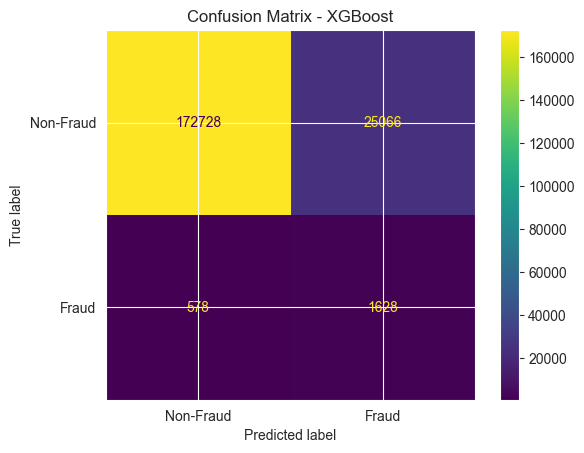

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=["Non-Fraud", "Fraud"])
plt.title("Confusion Matrix - XGBoost")
plt.show()


We can apply smote for might better result

In [67]:
smote=SMOTE(random_state=42)
x_res,y_res=smote.fit_resample(x_train,y_train)

In [68]:
x_res.shape

(1582354, 28)

train again the model

In [69]:
model_res=xgb.XGBClassifier(
    n_estimators=500,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    scale_pos_weight=scale,
    eval_metric='aucpr',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
)


In [70]:
model_res.fit(x_res,y_res)

C:\Users\anubhav goyal\PyCharmMiscProject\.venv\Lib\site-packages\xgboost\training.py:183: UserWarning: [13:02:50] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='aucpr', feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=-1, num_parallel_tree=None, ...)

In [71]:
y_res=model_res.predict(x_test)

In [72]:
cm_rs=confusion_matrix(y_test,y_res)

In [73]:
print(cm_rs)

[[165040  32754]
 [   466   1740]]


Threshold tuning & precision-Recall Analysis

In [74]:
from sklearn.metrics import precision_recall_curve,classification_report

In [ ]:
y

In [75]:
# get precision-Recall curve
precision,recall,thresholds=precision_recall_curve(y_test,y_proba)

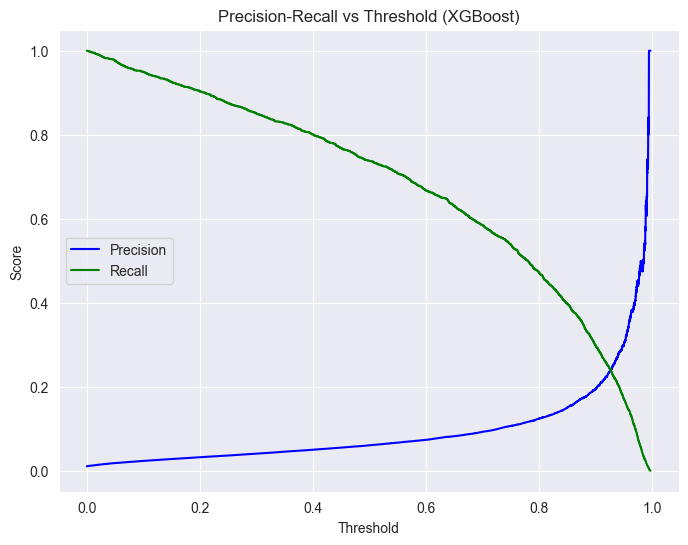

In [76]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label="Precision", color='blue')
plt.plot(thresholds, recall[:-1], label="Recall", color='green')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold (XGBoost)")
plt.legend()
plt.grid(True)
plt.show()

best threshold by max f1 score

for predicting with new threshold

In [77]:
f1_scores=2*(precision*recall)/(precision+recall+1e-8)
import numpy as np
best_threshold=thresholds[np.argmax(f1_scores)]
print(best_threshold)

0.9239588


In [78]:
y_pred_adjusted=(y_proba>best_threshold).astype(int)

In [79]:
print(confusion_matrix(y_test,y_pred_adjusted))

[[196009   1785]
 [  1659    547]]


we should try for low threshold


so let threshold to be slight 0.8239588

In [92]:
best_threshold_new=
y_pred_adjusted_2=(y_proba>best_threshold_new).astype(int)

In [93]:
print(confusion_matrix(y_test,y_pred_adjusted_2))

[[176734  21060]
 [   654   1552]]
